In [64]:
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import urllib.parse
import matplotlib.pyplot as plt
from collections import Counter
from urllib.parse import unquote
from urllib.parse import unquote
from scipy.ndimage import gaussian_filter

## Links

In [2]:
# The list of all links between articles
link = pd.read_csv('wikispeedia_datasets/wikispeedia_paths-and-graph/links.tsv', sep='\t', skiprows=12, header = None, names = ['linkSource','linkTarget'])
# Article names are URL-encoded, so it needs to be decoded
link[['linkSource', 'linkTarget']] = link[['linkSource', 'linkTarget']].applymap(unquote)
link[:10]

/var/folders/x6/gptz5cb53wd67vg3kngj1nbm0000gn/T/ipykernel_79086/269925302.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  link[['linkSource', 'linkTarget']] = link[['linkSource', 'linkTarget']].applymap(unquote)


,linkSource,linkTarget
0,Áedán_mac_Gabráin,Bede
1,Áedán_mac_Gabráin,Columba
2,Áedán_mac_Gabráin,Dál_Riata
3,Áedán_mac_Gabráin,Great_Britain
4,Áedán_mac_Gabráin,Ireland
5,Áedán_mac_Gabráin,Isle_of_Man
6,Áedán_mac_Gabráin,Monarchy
7,Áedán_mac_Gabráin,Orkney
8,Áedán_mac_Gabráin,Picts
9,Áedán_mac_Gabráin,Scotland


**Which source article has the most outgoing links?**

In [3]:
source_frequency = link['linkSource'].value_counts()
source_frequency[:10]

linkSource
United_States                                294
Driving_on_the_left_or_right                 255
List_of_countries                            244
List_of_circulating_currencies               236
List_of_sovereign_states                     216
Africa                                       212
List_of_countries_by_system_of_government    207
Lebanon                                      192
Interpol                                     191
Armenia                                      186
Name: count, dtype: int64

**Which target article has the most incoming links?**

In [4]:
target_frequency = link['linkTarget'].value_counts()
target_frequency[:10]

linkTarget
United_States       1551
United_Kingdom       972
France               959
Europe               933
England              751
World_War_II         751
Germany              743
India                611
English_language     598
London               587
Name: count, dtype: int64

**Which articles are more popular?**

In [5]:
hot_articles = pd.concat([source_frequency, target_frequency], axis=1, sort=False)
hot_articles.columns = ['source_count', 'target_count']
hot_articles = hot_articles.fillna(0) 
hot_articles['total_count'] = hot_articles['source_count'] + hot_articles['target_count']
hot_articles[:10]

,source_count,target_count,total_count
United_States,294.0,1551.0,1845.0
Driving_on_the_left_or_right,255.0,0.0,255.0
List_of_countries,244.0,63.0,307.0
List_of_circulating_currencies,236.0,8.0,244.0
List_of_sovereign_states,216.0,43.0,259.0
Africa,212.0,477.0,689.0
List_of_countries_by_system_of_government,207.0,246.0,453.0
Lebanon,192.0,114.0,306.0
Interpol,191.0,13.0,204.0
Armenia,186.0,99.0,285.0


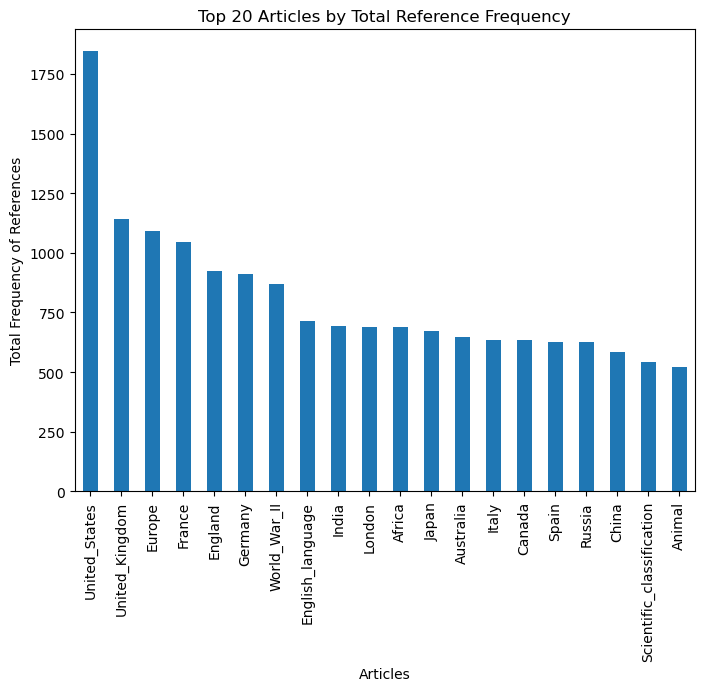

In [6]:
top_articles = hot_articles.sort_values(by='total_count', ascending=False).head(20)

plt.figure(figsize=(8, 6))
top_articles['total_count'].plot(kind='bar')
plt.title('Top 20 Articles by Total Reference Frequency')
plt.xlabel('Articles')
plt.ylabel('Total Frequency of References')
plt.xticks(rotation=90) 
plt.show()

In [22]:
#top_20_articles = top_articles['total_count']
#top_20_articles.to_csv('top_20_articles.csv')

## Categories

In [7]:
# Hierarchical categories of all articles
DATA_FOLDER='wikispeedia_datasets/wikispeedia_paths-and-graph/'
categories = pd.read_csv(DATA_FOLDER + 'categories.tsv', sep='\t', skiprows=13, header = None, names = ['article','category'])
categories[['article', 'category']] = categories[['article', 'category']].applymap(unquote)
categories[:10]

/var/folders/x6/gptz5cb53wd67vg3kngj1nbm0000gn/T/ipykernel_79086/3016577599.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  categories[['article', 'category']] = categories[['article', 'category']].applymap(unquote)


,article,category
0,Áedán_mac_Gabráin,subject.History.British_History.British_Histor...
1,Áedán_mac_Gabráin,subject.People.Historical_figures
2,Åland,subject.Countries
3,Åland,subject.Geography.European_Geography.European_...
4,Édouard_Manet,subject.People.Artists
5,Éire,subject.Countries
6,Éire,subject.Geography.European_Geography.European_...
7,Óengus_I_of_the_Picts,subject.History.British_History.British_Histor...
8,Óengus_I_of_the_Picts,subject.People.Historical_figures
9,€2_commemorative_coins,subject.Business_Studies.Currency


**What's the most frequent categories?**

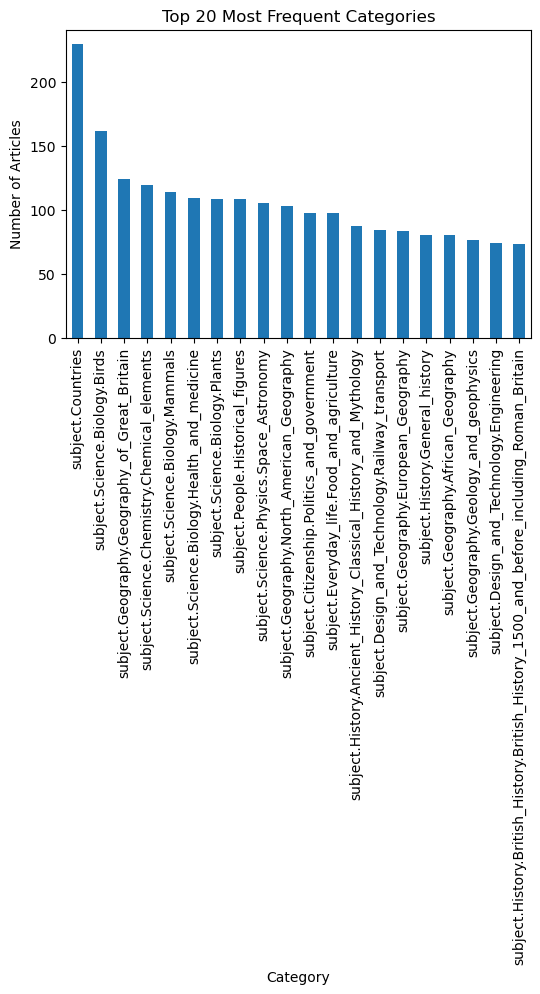

In [8]:
category_counts = categories['category'].value_counts()
top_categories = category_counts.head(20)

plt.figure(figsize=(6, 4))
top_categories.plot(kind='bar')
plt.title('Top 20 Most Frequent Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)  
plt.show()

**What's the most frequent MAIN categories?**

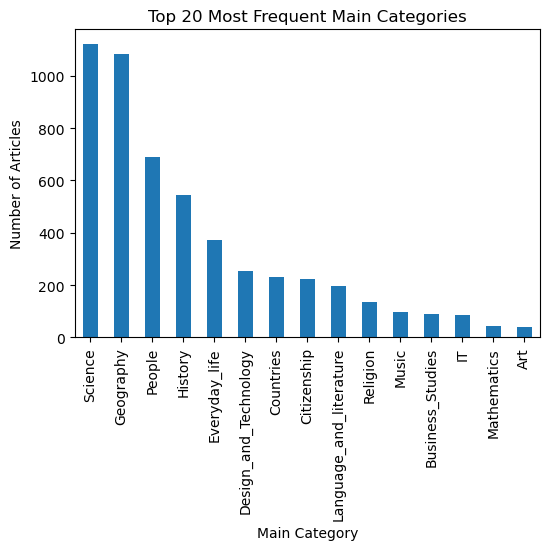

In [9]:
# Split each category string, skip the first word ("subject"), and take the second word as the main category.
categories['main_category'] = categories['category'].apply(lambda x: x.split('.')[1] if len(x.split('.')) > 1 else x)

# Calculate the number of articles for each main category.
main_category_counts = categories['main_category'].value_counts()
top_main_categories = main_category_counts.head(20)

plt.figure(figsize=(6, 4))
top_main_categories.plot(kind='bar')
plt.title('Top 20 Most Frequent Main Categories')
plt.xlabel('Main Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)  
plt.show()

In [30]:
main_category_counts

main_category
Science                    1122
Geography                  1084
People                      689
History                     545
Everyday_life               374
Design_and_Technology       254
Countries                   229
Citizenship                 224
Language_and_literature     196
Religion                    134
Music                        97
Business_Studies             88
IT                           85
Mathematics                  45
Art                          38
Name: count, dtype: int64

In [32]:
# top_main_categories.to_csv('main_categories.csv')

## Paths

In [10]:
paths_finished = pd.read_csv('wikispeedia_datasets/wikispeedia_paths-and-graph/paths_finished.tsv', sep='\t', skiprows = 16, header = None, names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'])
paths_unfinished = pd.read_csv('wikispeedia_datasets/wikispeedia_paths-and-graph/paths_unfinished.tsv', sep='\t', skiprows=17, header = None, names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'])

print('Completed paths: ' + str(len(paths_finished)))
print('Abandoned due to restart: ' + str(len(paths_unfinished[paths_unfinished['type'] == 'restart'])))
print('Abandoned due to timeout: ' + str(len(paths_unfinished[paths_unfinished['type'] == 'timeout'])))

Completed paths: 51318
Abandoned due to restart: 15552
Abandoned due to timeout: 9323


### Paths Finished

In [12]:
split_data = paths_finished['path'].str.split(';')

def decode_list(url_encoded_list):
    """Decodes url_encoded path."""
    return [urllib.parse.unquote(element).replace(',', '') for element in url_encoded_list]

split_data = split_data.apply(decode_list)

# extract source, target, and middle part of an article
paths_finished['source'] = split_data.apply(lambda x: x[0])
paths_finished['target'] = split_data.apply(lambda x: x[-1])
paths_finished['middle'] = split_data.apply(lambda x: x[1:-1])
paths_finished['source_target'] = paths_finished['source'] + '_' + paths_finished['target']

### Unfinished Paths

In [14]:
paths_unfinished.drop('type', axis=1, inplace=True)

split_data_2 = paths_unfinished['path'].str.split(';')
split_data_2 = split_data_2.apply(decode_list)

paths_unfinished['source'] = split_data_2.apply(lambda x: x[0])
paths_unfinished['middle'] = split_data_2.apply(lambda x: x[1:])
flattened_middle_2 = [item for sublist in paths_unfinished['middle'] for item in sublist]

# most common source article for unfinished paths
paths_unfinished['path_steps'] = split_data_2.apply(lambda x: len(x) - 1)
paths_unfinished['source_target'] = paths_unfinished['source'] + '_' + paths_unfinished['target']

new_order = ['hashedIpAddress','timestamp','durationInSec','path','source','target','middle','path_steps','source_target']
paths_unfinished = paths_unfinished[new_order]
paths_unfinished[:10]

,hashedIpAddress,timestamp,durationInSec,path,source,target,middle,path_steps,source_target
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Obi-Wan_Kenobi,Microsoft,[],0,Obi-Wan_Kenobi_Microsoft
1,26141fd878806294,1297055651,1805,Julius_Caesar,Julius_Caesar,Caracas,[],0,Julius_Caesar_Caracas
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,Malawi,First_Crusade,"[Democracy, Alexander_the_Great]",2,Malawi_First_Crusade
3,53a53bc244e08a6a,1297094761,49,Paraguay,Paraguay,Mount_St._Helens,[],0,Paraguay_Mount_St._Helens
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Paraguay,Mount_St._Helens,[Bolivia],1,Paraguay_Mount_St._Helens
5,131600803df4895e,1297100557,2009,Agriculture;History_of_the_world;China;Yangtze...,Agriculture,Grand_Canal_of_China,"[History_of_the_world, China, Yangtze_River]",3,Agriculture_Grand_Canal_of_China
6,486bb79910fe9dd2,1297101660,1932,Mind;Christianity;Europe;Renaissance;Ancient_G...,Mind,Scouting,"[Christianity, Europe, Renaissance, Ancient_Gr...",6,Mind_Scouting
7,6d136e371e42474f,1297102070,175,4-2-0;United_States;Agriculture;Sugar;Australia,4-2-0,Cane_Toad,"[United_States, Agriculture, Sugar, Australia]",4,4-2-0_Cane_Toad
8,6d136e371e42474f,1297102100,19,Logic,Logic,Moon_landing,[],0,Logic_Moon_landing
9,6d136e371e42474f,1297104110,2006,Logic;Computer_science;Science;Physical_scienc...,Logic,Moon_landing,"[Computer_science, Science, Physical_science, ...",8,Logic_Moon_landing


### Paths with Categories

In [15]:
paths_finished['finished'] = 1
paths_unfinished['finished'] = 0
# combine finished paths and unfinished paths
paths_all = pd.concat([paths_finished, paths_unfinished], ignore_index=True) 

In [16]:
# Some articles belong to more than one category
category_counts = categories.groupby('article')['category'].count()
articles_with_multiple_categories = category_counts[category_counts > 1]
print(articles_with_multiple_categories)

article
Abacus                   2
Abbey                    2
Abbot                    2
Abkhazia                 2
Abu_Dhabi                2
                        ..
Zuid-Gelders             2
Áedán_mac_Gabráin        2
Åland                    2
Éire                     2
Óengus_I_of_the_Picts    2
Name: category, Length: 598, dtype: int64


In [17]:
# For example...
categories[categories.article == 'Greece']

,article,category,main_category
2026,Greece,subject.Countries,Countries
2027,Greece,subject.Geography.European_Geography.European_...,Geography


In [18]:
# Keep only the first category per article
first_category_per_article = categories.groupby('article').first()
first_category_per_article.head(10)

,category,main_category
article,,
10th_century,subject.History.General_history,History
11th_century,subject.History.General_history,History
12th_century,subject.History.General_history,History
13th_century,subject.History.General_history,History
14th_century,subject.History.General_history,History
15th_Marine_Expeditionary_Unit,subject.History.Military_History_and_War,History
15th_century,subject.History.General_history,History
16_Cygni,subject.Science.Physics.Space_Astronomy,Science
16_Cygni_Bb,subject.Science.Physics.Space_Astronomy,Science


### Mistral Category Flow

In [20]:
# Mistral data
mistral = pd.read_csv('mistral.csv', index_col=0)
mistral.head()

,player_type,game_pair,path_decoded,iteration,origin,goal,finished
0,mistral,Brain->Telephone,"['Brain', 'Computer_science', 'Computer_progra...",0,Brain,Telephone,1
1,mistral,Brain->Telephone,"['Brain', 'Computer_science', 'Computer_progra...",1,Brain,Telephone,1
2,mistral,Brain->Telephone,"['Brain', 'Computer_science', 'Information', '...",2,Brain,Telephone,1
3,mistral,Brain->Telephone,"['Brain', 'Computer_science', 'Information', '...",3,Brain,Telephone,1
4,mistral,Brain->Telephone,"['Brain', 'Computer_science', 'Information', '...",4,Brain,Telephone,1


In [24]:
# Find main category for source of mistral games
mistral_2 = mistral.merge(first_category_per_article, how='left', left_on='origin', right_on='article')
mistral_2.rename(columns={'main_category':'source_main_category'}, inplace=True)
# Find main category for target of mistral games
mistral_3 = mistral_2.merge(first_category_per_article, how='left', left_on='goal', right_on='article')
mistral_3.rename(columns={'main_category':'target_main_category'}, inplace=True)
mistral_3

,player_type,game_pair,path_decoded,iteration,origin,goal,finished,category_x,source_main_category,category_y,target_main_category
0,mistral,Brain->Telephone,"['Brain', 'Computer_science', 'Computer_progra...",0,Brain,Telephone,1,subject.Science.Biology.General_Biology,Science,subject.Design_and_Technology.Engineering,Design_and_Technology
1,mistral,Brain->Telephone,"['Brain', 'Computer_science', 'Computer_progra...",1,Brain,Telephone,1,subject.Science.Biology.General_Biology,Science,subject.Design_and_Technology.Engineering,Design_and_Technology
2,mistral,Brain->Telephone,"['Brain', 'Computer_science', 'Information', '...",2,Brain,Telephone,1,subject.Science.Biology.General_Biology,Science,subject.Design_and_Technology.Engineering,Design_and_Technology
3,mistral,Brain->Telephone,"['Brain', 'Computer_science', 'Information', '...",3,Brain,Telephone,1,subject.Science.Biology.General_Biology,Science,subject.Design_and_Technology.Engineering,Design_and_Technology
4,mistral,Brain->Telephone,"['Brain', 'Computer_science', 'Information', '...",4,Brain,Telephone,1,subject.Science.Biology.General_Biology,Science,subject.Design_and_Technology.Engineering,Design_and_Technology
...,...,...,...,...,...,...,...,...,...,...,...
2498,mistral,Apple->Fruit,"['Apple', 'Fruit']",25,Apple,Fruit,1,subject.Everyday_life.Food_and_agriculture,Everyday_life,subject.Everyday_life.Food_and_agriculture,Everyday_life
2499,mistral,Apple->Fruit,"['Apple', 'Fruit']",26,Apple,Fruit,1,subject.Everyday_life.Food_and_agriculture,Everyday_life,subject.Everyday_life.Food_and_agriculture,Everyday_life
2500,mistral,Apple->Fruit,"['Apple', 'Fruit']",27,Apple,Fruit,1,subject.Everyday_life.Food_and_agriculture,Everyday_life,subject.Everyday_life.Food_and_agriculture,Everyday_life
2501,mistral,Apple->Fruit,"['Apple', 'Fruit']",28,Apple,Fruit,1,subject.Everyday_life.Food_and_agriculture,Everyday_life,subject.Everyday_life.Food_and_agriculture,Everyday_life


In [25]:
# Mistral category flow
mistral_category_flow = mistral_3[['source_main_category', 'target_main_category']]
mistral_category_flow

,source_main_category,target_main_category
0,Science,Design_and_Technology
1,Science,Design_and_Technology
2,Science,Design_and_Technology
3,Science,Design_and_Technology
4,Science,Design_and_Technology
...,...,...
2498,Everyday_life,Everyday_life
2499,Everyday_life,Everyday_life
2500,Everyday_life,Everyday_life
2501,Everyday_life,Everyday_life


In [61]:
# Find counts for each flow and only keep the top 8 main categories
mistral_flow_counts = mistral_category_flow.groupby(['source_main_category', 'target_main_category']).size().reset_index(name='count')
top_8_source_category = mistral_category_flow.groupby(['source_main_category']).size().reset_index(name='count').sort_values(by='count', ascending=False)['source_main_category'].head(8).tolist()
top_8_target_category = mistral_category_flow.groupby(['target_main_category']).size().reset_index(name='count').sort_values(by='count', ascending=False)['target_main_category'].head(8).tolist()
mistral_flow_counts_2 = mistral_flow_counts[mistral_flow_counts.source_main_category.isin(top_8_source_category)]
mistral_flow_counts_3 = mistral_flow_counts_2[mistral_flow_counts_2.target_main_category.isin(top_8_target_category)]

In [63]:
#mistral_flow_counts_3.to_csv('mistral_flow_counts.csv')
#mistral_flow_counts.to_csv('mistral_flow_counts_full.csv')

### Human Category flow

In [31]:
# Merge human paths with category
paths_all_category_2 = paths_all.merge(first_category_per_article, how='left', left_on='source', right_on='article')
paths_all_category_2.drop('category', axis=1, inplace=True)
paths_all_category_2.rename(columns={'main_category':'source_main_category'}, inplace=True)

paths_all_category_3 = paths_all_category_2.merge(first_category_per_article, how='left', left_on='target', right_on='article')
paths_all_category_3.drop('category', axis=1, inplace=True)
paths_all_category_3.rename(columns={'main_category':'target_main_category'}, inplace=True)

In [34]:
# Human category flow counts
category_flow = paths_all_category_3[['source_main_category', 'target_main_category']]
category_flow

,source_main_category,target_main_category
0,History,History
1,History,History
2,History,History
3,History,Countries
4,History,People
...,...,...
76188,People,Science
76189,History,Language_and_literature
76190,IT,Music
76191,Geography,People


In [35]:
flow_counts = category_flow.groupby(['source_main_category', 'target_main_category']).size().reset_index(name='count')
flow_counts[:10]

,source_main_category,target_main_category,count
0,Art,Art,6
1,Art,Business_Studies,14
2,Art,Citizenship,22
3,Art,Countries,11
4,Art,Design_and_Technology,12
5,Art,Everyday_life,124
6,Art,Geography,111
7,Art,History,26
8,Art,IT,10
9,Art,Language_and_literature,10


In [41]:
# Only keep the main categories for plotting
main_categories = ['Science', 'Geography', 'People', 'History', 'Everyday_life', 'Design_and_Technology', 'Countries', 'Citizenship']
flow_counts_1 = flow_counts[flow_counts.source_main_category.isin(main_categories)]
flow_counts_2 = flow_counts_1[flow_counts_1.target_main_category.isin(main_categories)]
flow_counts_2

,source_main_category,target_main_category,count
32,Citizenship,Citizenship,140
33,Citizenship,Countries,83
34,Citizenship,Design_and_Technology,129
35,Citizenship,Everyday_life,359
36,Citizenship,Geography,581
...,...,...,...
215,Science,Everyday_life,1499
216,Science,Geography,3257
217,Science,History,3037
222,Science,People,1913


In [38]:
flow_counts_2.to_csv('flow_counts_2.csv')
flow_counts.to_csv('flow_counts.csv')

# Heatmap

In [65]:
# Use this csv file to get link positions. Credits to https://github.com/epfl-ada/ada-2022-project-adaandthelovelaces 
link_positions = pd.read_csv('output_link_position.csv', usecols=['linkSource_URL', 'linkTarget_URL', 'xpos', 'ypos', 'is_on_top'])
link_positions.head()

,linkSource_URL,linkTarget_URL,xpos,ypos,is_on_top
0,%E2%82%AC2_commemorative_coins,Athens,557,941,0.0
1,%E2%82%AC2_commemorative_coins,Atlantic_Ocean,1131,5592,0.0
2,%E2%82%AC2_commemorative_coins,Austria,438,493,1.0
3,%E2%82%AC2_commemorative_coins,Belgium,484,493,1.0
4,%E2%82%AC2_commemorative_coins,Berlin,621,6273,0.0


In [66]:
# convert string to list
def string_to_list(string):
    return ast.literal_eval(string)

# read mistral data file
mistral = pd.read_csv('mistral.csv', index_col=0)
mistral.path_decoded = mistral.path_decoded.apply(string_to_list)
mistral.head()

,player_type,game_pair,path_decoded,iteration,origin,goal,finished
0,mistral,Brain->Telephone,"[Brain, Computer_science, Computer_programming...",0,Brain,Telephone,1
1,mistral,Brain->Telephone,"[Brain, Computer_science, Computer_programming...",1,Brain,Telephone,1
2,mistral,Brain->Telephone,"[Brain, Computer_science, Information, Communi...",2,Brain,Telephone,1
3,mistral,Brain->Telephone,"[Brain, Computer_science, Information, Communi...",3,Brain,Telephone,1
4,mistral,Brain->Telephone,"[Brain, Computer_science, Information, Communi...",4,Brain,Telephone,1


In [67]:
def get_link_position(source, target):
    """
    Find positions of a desired article.
    """
    # Find the matching row for the source and target
    position = link_positions[
        (link_positions['linkSource_URL'] == source) &
        (link_positions['linkTarget_URL'] == target)
    ]

    # If a match is found, return the position data
    if not position.empty:
        return {
            'xpos': position['xpos'].iloc[0],
            'ypos': position['ypos'].iloc[0],
            'is_on_top': position['is_on_top'].iloc[0]
        }
    else:
        # If no match is found, return None
        return None

def create_tuples(row):
    """
    Create tuples for paths.
    """
    return [(row[i], row[i+1]) for i in range(len(row)-1)]

mistral.path_decoded = mistral.path_decoded.apply(create_tuples)
mistral.head()

,player_type,game_pair,path_decoded,iteration,origin,goal,finished
0,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",0,Brain,Telephone,1
1,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",1,Brain,Telephone,1
2,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",2,Brain,Telephone,1
3,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",3,Brain,Telephone,1
4,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",4,Brain,Telephone,1


In [68]:
# For all games Mistral played, find positions for all links along paths
x_positions = []
y_positions = []
is_on_top_values = []
for index, row in mistral.iterrows():
   
    link_pairs = row['path_decoded']
    
    x_positions_row = []
    y_positions_row = []
    is_on_top_row = []
    
    for source, target in link_pairs:
       
        position = get_link_position(source, target)
        
        if position:
            x_positions_row.append(position['xpos'])
            y_positions_row.append(position['ypos'])
            is_on_top_row.append(position['is_on_top'])
        else:
            x_positions_row.append(None)
            y_positions_row.append(None)
            is_on_top_row.append(None)
    
    x_positions.append(x_positions_row)
    y_positions.append(y_positions_row)
    is_on_top_values.append(is_on_top_row)

mistral['x_positions'] = x_positions
mistral['y_positions'] = y_positions
mistral['is_on_top'] = is_on_top_values
mistral
#mistral.to_csv('mistral_with_positions.csv')

,player_type,game_pair,path_decoded,iteration,origin,goal,finished,x_positions,y_positions,is_on_top
0,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",0,Brain,Telephone,1,"[810, 19, 1015, 308, 153, 1466, 308, 153, 1066...","[3032, 113, 1169, 848, 2603, 460, 848, 2603, 7...","[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, ..."
1,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",1,Brain,Telephone,1,"[810, 19, 1015, 419, 555, 239, 221, 102]","[3032, 113, 1169, 1492, 985, 94, 1607, 897]","[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]"
2,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",2,Brain,Telephone,1,"[810, 522, 1079, 713]","[3032, 75, 100, 1197]","[0.0, 1.0, 1.0, 0.0]"
3,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",3,Brain,Telephone,1,"[810, 522, 1079, 713]","[3032, 75, 100, 1197]","[0.0, 1.0, 1.0, 0.0]"
4,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",4,Brain,Telephone,1,"[810, 522, 1079, 713]","[3032, 75, 100, 1197]","[0.0, 1.0, 1.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...
2498,mistral,Apple->Fruit,"[(Apple, Fruit)]",25,Apple,Fruit,1,[240],[75],[1.0]
2499,mistral,Apple->Fruit,"[(Apple, Fruit)]",26,Apple,Fruit,1,[240],[75],[1.0]
2500,mistral,Apple->Fruit,"[(Apple, Fruit)]",27,Apple,Fruit,1,[240],[75],[1.0]
2501,mistral,Apple->Fruit,"[(Apple, Fruit)]",28,Apple,Fruit,1,[240],[75],[1.0]


In [69]:
mistral_games = list(mistral.game_pair.unique())
len(mistral_games)    # number of games Mistral played

75

In [70]:
# This csv provides positions for all links along paths that are finished
paths_finished_with_positions = pd.read_csv('paths_finished_with_positions.csv')
paths_finished_with_positions = paths_finished_with_positions[['path', 'link_pairs', 'x_positions', 'y_positions', 'is_on_top']]
split_data = paths_finished_with_positions['path'].str.split(';')

def decode_list(url_encoded_list):
    """Decodes url_encoded path."""
    return [unquote(element).replace(',', '') for element in url_encoded_list]

split_data = split_data.apply(decode_list)

paths_finished_with_positions['origin'] = split_data.apply(lambda x: x[0])
paths_finished_with_positions['goal'] = split_data.apply(lambda x: x[-1])
paths_finished_with_positions['game_pair'] = paths_finished_with_positions['origin'] + '->' + paths_finished_with_positions['goal']

# Only select games Mistral played from the human dataset
human = paths_finished_with_positions[paths_finished_with_positions.game_pair.isin(mistral_games)]
len(human.game_pair.unique())

75

In [71]:
# Get all coordinates for links along human paths
human.x_positions = human.x_positions.apply(string_to_list)
human.y_positions = human.y_positions.apply(string_to_list)
human['coordinates'] = human.apply(lambda row: list(zip(row['x_positions'], row['y_positions'])), axis=1)
human_coordinates = human['coordinates'].explode().tolist()

def filter_none(pairs_list):
    return [pair for pair in pairs_list if None not in pair]

human_coordinates = filter_none(human_coordinates)
len(human_coordinates)

/var/folders/x6/gptz5cb53wd67vg3kngj1nbm0000gn/T/ipykernel_79086/3720731201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human.x_positions = human.x_positions.apply(string_to_list)
/var/folders/x6/gptz5cb53wd67vg3kngj1nbm0000gn/T/ipykernel_79086/3720731201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human.y_positions = human.y_positions.apply(string_to_list)
/var/folders/x6/gptz5cb53wd67vg3kngj1nbm0000gn/T/ipykernel_79086/3720731201.py:4: SettingWithCopyWarning: 
A value is trying to be set o

32669

In [13]:
# human.to_csv('human_with_positions.csv')

In [72]:
# To get coordinates for links along Mistra paths
mistral_with_positions = pd.read_csv('mistral_with_positions.csv', index_col=0)
mistral_with_positions.x_positions = mistral_with_positions.x_positions.apply(string_to_list)
mistral_with_positions.y_positions = mistral_with_positions.y_positions.apply(string_to_list)
mistral_with_positions['coordinates'] = mistral_with_positions.apply(lambda row: list(zip(row['x_positions'], row['y_positions'])), axis=1)
mistral_coordinates = mistral_with_positions['coordinates'].explode().tolist()
mistral_coordinates = filter_none(mistral_coordinates)
len(mistral_coordinates)

18013

### Illustration

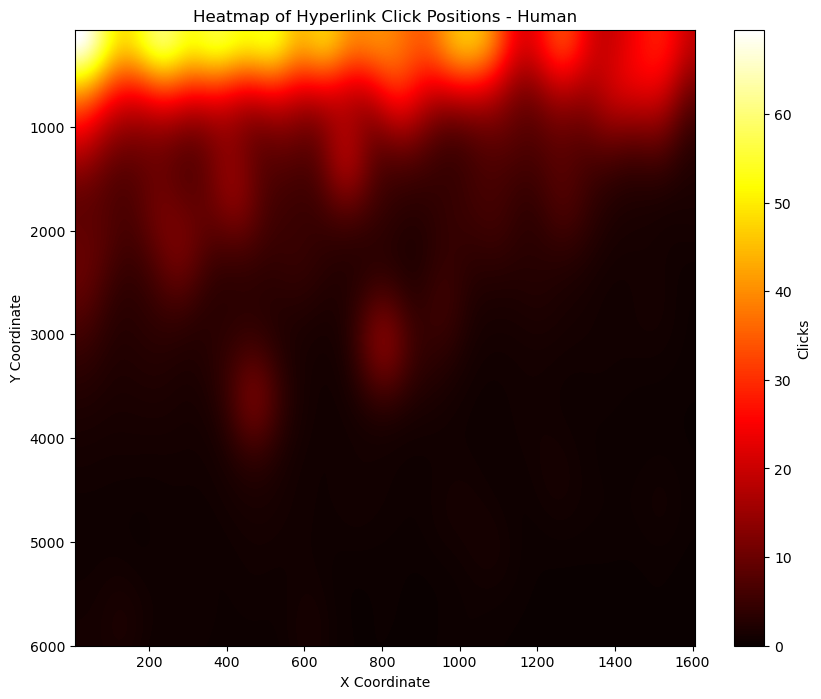

In [265]:
# Heatmap for human
x_coords = [coord[0] for coord in human_coordinates]
y_coords = [coord[1] for coord in human_coordinates]

# Define the number of bins for the histogram
x_bins = np.linspace(min(x_coords), max(x_coords), 100)
y_bins = np.linspace(min(y_coords), max(y_coords), 100)

# Calculate the 2D histogram to get the counts
counts, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=(x_bins, y_bins))

# Apply a Gaussian filter to smooth the histogram and make it continuous
heatmap_smoothed = gaussian_filter(counts, sigma=3)

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
x_bin_centers = (xedges[:-1] + xedges[1:]) / 2
y_bin_centers = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(x_bin_centers, y_bin_centers)

c = ax.imshow(heatmap_smoothed.T, cmap='hot', interpolation='spline16', 
              extent=[x_bin_centers[0], x_bin_centers[-1], y_bin_centers[0], y_bin_centers[-1]], 
              origin='lower', aspect='auto')
fig.colorbar(c, ax=ax, label='Clicks')

y_max_limit = 6000  
ax.set_ylim(top=y_max_limit)

ax.invert_yaxis()

plt.title('Heatmap of Hyperlink Click Positions - Human')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.savefig('heatmap_human.png')
plt.show()

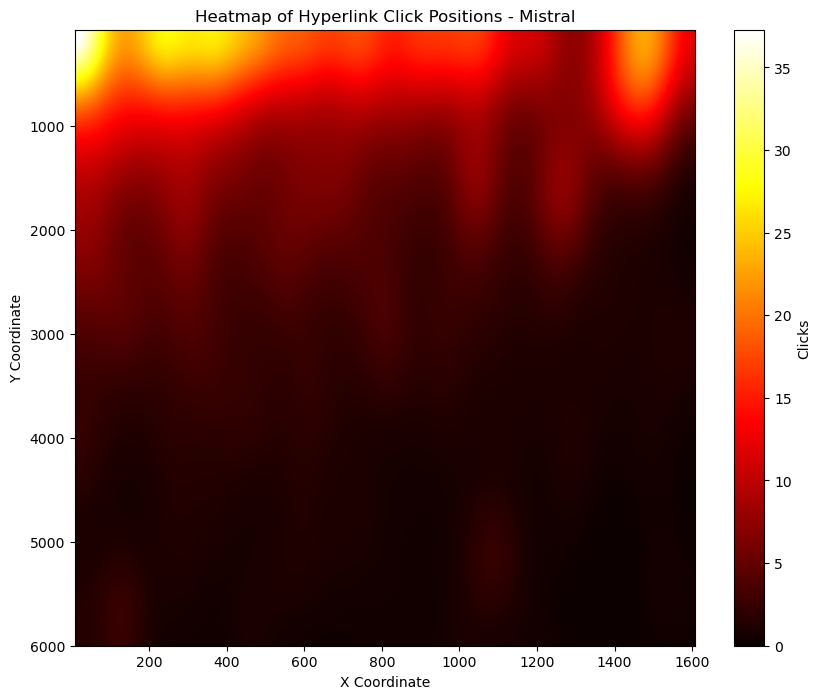

In [266]:
# Heatmap for Mistral
x_coords = [coord[0] for coord in mistral_coordinates]
y_coords = [coord[1] for coord in mistral_coordinates]

x_bins = np.linspace(min(x_coords), max(x_coords), 100)
y_bins = np.linspace(min(y_coords), max(y_coords), 100)

counts, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=(x_bins, y_bins))

heatmap_smoothed = gaussian_filter(counts, sigma=3)

fig, ax = plt.subplots(figsize=(10, 8))
x_bin_centers = (xedges[:-1] + xedges[1:]) / 2
y_bin_centers = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(x_bin_centers, y_bin_centers)

c = ax.imshow(heatmap_smoothed.T, cmap='hot', interpolation='spline16', 
              extent=[x_bin_centers[0], x_bin_centers[-1], y_bin_centers[0], y_bin_centers[-1]], 
              origin='lower', aspect='auto')
fig.colorbar(c, ax=ax, label='Clicks')

y_max_limit = 6000 
ax.set_ylim(top=y_max_limit)

ax.invert_yaxis()

plt.title('Heatmap of Hyperlink Click Positions - Mistral')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.savefig('heatmap_mistral.png')
plt.show()

# Heatmap

In [277]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

from urllib.parse import unquote
from collections import Counter
from scipy.ndimage import gaussian_filter

In [267]:
# Use this csv file to get link positions. Credits to https://github.com/epfl-ada/ada-2022-project-adaandthelovelaces 
link_positions = pd.read_csv('output_link_position.csv', usecols=['linkSource_URL', 'linkTarget_URL', 'xpos', 'ypos', 'is_on_top'])
link_positions.head()

,linkSource_URL,linkTarget_URL,xpos,ypos,is_on_top
0,%E2%82%AC2_commemorative_coins,Athens,557,941,0.0
1,%E2%82%AC2_commemorative_coins,Atlantic_Ocean,1131,5592,0.0
2,%E2%82%AC2_commemorative_coins,Austria,438,493,1.0
3,%E2%82%AC2_commemorative_coins,Belgium,484,493,1.0
4,%E2%82%AC2_commemorative_coins,Berlin,621,6273,0.0


In [268]:
# convert string to list
def string_to_list(string):
    return ast.literal_eval(string)

mistral = pd.read_csv('mistral.csv', index_col=0)
mistral.path_decoded = mistral.path_decoded.apply(string_to_list)
mistral

,player_type,game_pair,path_decoded,iteration,origin,goal,finished
0,mistral,Brain->Telephone,"[Brain, Computer_science, Computer_programming...",0,Brain,Telephone,1
1,mistral,Brain->Telephone,"[Brain, Computer_science, Computer_programming...",1,Brain,Telephone,1
2,mistral,Brain->Telephone,"[Brain, Computer_science, Information, Communi...",2,Brain,Telephone,1
3,mistral,Brain->Telephone,"[Brain, Computer_science, Information, Communi...",3,Brain,Telephone,1
4,mistral,Brain->Telephone,"[Brain, Computer_science, Information, Communi...",4,Brain,Telephone,1
...,...,...,...,...,...,...,...
2498,mistral,Apple->Fruit,"[Apple, Fruit]",25,Apple,Fruit,1
2499,mistral,Apple->Fruit,"[Apple, Fruit]",26,Apple,Fruit,1
2500,mistral,Apple->Fruit,"[Apple, Fruit]",27,Apple,Fruit,1
2501,mistral,Apple->Fruit,"[Apple, Fruit]",28,Apple,Fruit,1


In [269]:
def get_link_position(source, target):
    """
    Find positions of a desired article.
    """
    # Find the matching row for the source and target
    position = link_positions[
        (link_positions['linkSource_URL'] == source) &
        (link_positions['linkTarget_URL'] == target)
    ]

    # If a match is found, return the position data
    if not position.empty:
        return {
            'xpos': position['xpos'].iloc[0],
            'ypos': position['ypos'].iloc[0],
            'is_on_top': position['is_on_top'].iloc[0]
        }
    else:
        # If no match is found, return None
        return None

def create_tuples(row):
    """
    Create tuples for paths.
    """
    return [(row[i], row[i+1]) for i in range(len(row)-1)]

mistral.path_decoded = mistral.path_decoded.apply(create_tuples)
mistral.head()

,player_type,game_pair,path_decoded,iteration,origin,goal,finished
0,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",0,Brain,Telephone,1
1,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",1,Brain,Telephone,1
2,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",2,Brain,Telephone,1
3,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",3,Brain,Telephone,1
4,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",4,Brain,Telephone,1


In [270]:
# For all games Mistral played, find positions for all links along paths
x_positions = []
y_positions = []
is_on_top_values = []
for index, row in mistral.iterrows():
   
    link_pairs = row['path_decoded']
    
    x_positions_row = []
    y_positions_row = []
    is_on_top_row = []
    
    for source, target in link_pairs:
       
        position = get_link_position(source, target)
        
        if position:
            x_positions_row.append(position['xpos'])
            y_positions_row.append(position['ypos'])
            is_on_top_row.append(position['is_on_top'])
        else:
            x_positions_row.append(None)
            y_positions_row.append(None)
            is_on_top_row.append(None)
    
    x_positions.append(x_positions_row)
    y_positions.append(y_positions_row)
    is_on_top_values.append(is_on_top_row)

mistral['x_positions'] = x_positions
mistral['y_positions'] = y_positions
mistral['is_on_top'] = is_on_top_values
mistral
mistral.to_csv('mistral_with_positions.csv')

,player_type,game_pair,path_decoded,iteration,origin,goal,finished,x_positions,y_positions,is_on_top
0,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",0,Brain,Telephone,1,"[810, 19, 1015, 308, 153, 1466, 308, 153, 1066...","[3032, 113, 1169, 848, 2603, 460, 848, 2603, 7...","[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, ..."
1,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",1,Brain,Telephone,1,"[810, 19, 1015, 419, 555, 239, 221, 102]","[3032, 113, 1169, 1492, 985, 94, 1607, 897]","[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]"
2,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",2,Brain,Telephone,1,"[810, 522, 1079, 713]","[3032, 75, 100, 1197]","[0.0, 1.0, 1.0, 0.0]"
3,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",3,Brain,Telephone,1,"[810, 522, 1079, 713]","[3032, 75, 100, 1197]","[0.0, 1.0, 1.0, 0.0]"
4,mistral,Brain->Telephone,"[(Brain, Computer_science), (Computer_science,...",4,Brain,Telephone,1,"[810, 522, 1079, 713]","[3032, 75, 100, 1197]","[0.0, 1.0, 1.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...
2498,mistral,Apple->Fruit,"[(Apple, Fruit)]",25,Apple,Fruit,1,[240],[75],[1.0]
2499,mistral,Apple->Fruit,"[(Apple, Fruit)]",26,Apple,Fruit,1,[240],[75],[1.0]
2500,mistral,Apple->Fruit,"[(Apple, Fruit)]",27,Apple,Fruit,1,[240],[75],[1.0]
2501,mistral,Apple->Fruit,"[(Apple, Fruit)]",28,Apple,Fruit,1,[240],[75],[1.0]


In [272]:
mistral_games = list(mistral.game_pair.unique())
len(mistral_games) # number of games Mistral played

75

In [274]:
# This csv provides positions for all links along paths that are finished
paths_finished_with_positions = pd.read_csv('paths_finished_with_positions.csv')
paths_finished_with_positions = paths_finished_with_positions[['path', 'link_pairs', 'x_positions', 'y_positions', 'is_on_top']]
split_data = paths_finished_with_positions['path'].str.split(';')

def decode_list(url_encoded_list):
    """Decodes url_encoded path."""
    return [urllib.parse.unquote(element).replace(',', '') for element in url_encoded_list]

split_data = split_data.apply(decode_list)

paths_finished_with_positions['origin'] = split_data.apply(lambda x: x[0])
paths_finished_with_positions['goal'] = split_data.apply(lambda x: x[-1])
paths_finished_with_positions['game_pair'] = paths_finished_with_positions['origin'] + '->' + paths_finished_with_positions['goal']

# Only select games Mistral played from the human dataset
human = paths_finished_with_positions[paths_finished_with_positions.game_pair.isin(mistral_games)]
len(human.game_pair.unique())

75

In [275]:
# Get all coordinates for links along human paths
human.x_positions = human.x_positions.apply(string_to_list)
human.y_positions = human.y_positions.apply(string_to_list)
human['coordinates'] = human.apply(lambda row: list(zip(row['x_positions'], row['y_positions'])), axis=1)
human_coordinates = human['coordinates'].explode().tolist()

def filter_none(pairs_list):
    return [pair for pair in pairs_list if None not in pair]

human_coordinates = filter_none(human_coordinates)
len(human_coordinates)

/var/folders/x6/gptz5cb53wd67vg3kngj1nbm0000gn/T/ipykernel_34968/2833528030.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/x6/gptz5cb53wd67vg3kngj1nbm0000gn/T/ipykernel_34968/2833528030.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/x6/gptz5cb53wd67vg3kngj1nbm0000gn/T/ipykernel_34968/2833528030.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

32669

In [298]:
human_link_pairs = []

for index, row in human.iterrows():
    # Each cell in the 'link_pairs' column contains a list of tuples
    # Each cell in the 'y_positions' column contains a list of y-positions
    row['link_pairs']=string_to_list(row['link_pairs'])
    for i, link_pair in enumerate(row['link_pairs']):
        # Append a new row to the list for each link pair
        # This assumes that the y_positions are aligned with link_pairs
        
        human_link_pairs.append({'link_pair': link_pair, 'y_position': row['y_positions'][i]})
       
       

human_link_pairs_df = pd.DataFrame(human_link_pairs)
human_link_pairs_unique = human_link_pairs_df.drop_duplicates(subset='link_pair')

In [299]:
human_link_pairs_unique

,link_pair,y_position
0,"(14th_century, Time)",94.0
1,"(Time, Isaac_Newton)",76.0
2,"(Isaac_Newton, Light)",157.0
3,"(Light, Color)",139.0
4,"(Color, Rainbow)",424.0
...,...,...
36100,"(Evolution, Organism)",94.0
36149,"(Canada, Toronto)",467.0
36150,"(Toronto, North_America)",75.0
36161,"(The_Simpsons, Earth)",3009.0


In [317]:
human_link_pairs_unique_filtered = human_link_pairs_unique[human_link_pairs_unique['y_position'] > 5000]
human_link_pairs_unique_filtered

,link_pair,y_position
179,"(United_States, Education_in_the_United_States)",6407.0
293,"(United_States, World_Health_Organization)",6653.0
333,"(Trojan_War, Cyclops)",5451.0
390,"(Greek_mythology, France)",5201.0
399,"(Trojan_War, William_Shakespeare)",7336.0
...,...,...
35073,"(Berlin, Park)",6729.0
35247,"(United_States, Latin_America)",5748.0
35284,"(Beijing, South_Africa)",10518.0
35549,"(United_States, Multiculturalism)",6954.0


In [304]:
mistral_link_pairs = []

for index, row in mistral_with_positions.iterrows():
    # Each cell in the 'link_pairs' column contains a list of tuples
    # Each cell in the 'y_positions' column contains a list of y-positions
    row['path_decoded']=string_to_list(row['path_decoded'])
    for i, link_pair in enumerate(row['path_decoded']):
        # Append a new row to the list for each link pair
        # This assumes that the y_positions are aligned with link_pairs
        
        mistral_link_pairs.append({'link_pair': link_pair, 'y_position': row['y_positions'][i]})
       
       

mistral_link_pairs_df = pd.DataFrame(mistral_link_pairs)
mistral_link_pairs_unique = mistral_link_pairs_df.drop_duplicates(subset='link_pair')

In [276]:
# To get coordinates for links along Mistra paths
mistral_with_positions = pd.read_csv('mistral_with_positions.csv', index_col=0)
mistral_with_positions.x_positions = mistral_with_positions.x_positions.apply(string_to_list)
mistral_with_positions.y_positions = mistral_with_positions.y_positions.apply(string_to_list)
mistral_with_positions['coordinates'] = mistral_with_positions.apply(lambda row: list(zip(row['x_positions'], row['y_positions'])), axis=1)
mistral_coordinates = mistral_with_positions['coordinates'].explode().tolist()
mistral_coordinates = filter_none(mistral_coordinates)
len(mistral_coordinates)

18013

In [301]:
mistral_with_positions

,player_type,game_pair,path_decoded,iteration,origin,goal,finished,x_positions,y_positions,is_on_top,coordinates
0,mistral,Brain->Telephone,"[('Brain', 'Computer_science'), ('Computer_sci...",0,Brain,Telephone,1,"[810, 19, 1015, 308, 153, 1466, 308, 153, 1066...","[3032, 113, 1169, 848, 2603, 460, 848, 2603, 7...","[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...","[(810, 3032), (19, 113), (1015, 1169), (308, 8..."
1,mistral,Brain->Telephone,"[('Brain', 'Computer_science'), ('Computer_sci...",1,Brain,Telephone,1,"[810, 19, 1015, 419, 555, 239, 221, 102]","[3032, 113, 1169, 1492, 985, 94, 1607, 897]","[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0]","[(810, 3032), (19, 113), (1015, 1169), (419, 1..."
2,mistral,Brain->Telephone,"[('Brain', 'Computer_science'), ('Computer_sci...",2,Brain,Telephone,1,"[810, 522, 1079, 713]","[3032, 75, 100, 1197]","[0.0, 1.0, 1.0, 0.0]","[(810, 3032), (522, 75), (1079, 100), (713, 11..."
3,mistral,Brain->Telephone,"[('Brain', 'Computer_science'), ('Computer_sci...",3,Brain,Telephone,1,"[810, 522, 1079, 713]","[3032, 75, 100, 1197]","[0.0, 1.0, 1.0, 0.0]","[(810, 3032), (522, 75), (1079, 100), (713, 11..."
4,mistral,Brain->Telephone,"[('Brain', 'Computer_science'), ('Computer_sci...",4,Brain,Telephone,1,"[810, 522, 1079, 713]","[3032, 75, 100, 1197]","[0.0, 1.0, 1.0, 0.0]","[(810, 3032), (522, 75), (1079, 100), (713, 11..."
...,...,...,...,...,...,...,...,...,...,...,...
2498,mistral,Apple->Fruit,"[('Apple', 'Fruit')]",25,Apple,Fruit,1,[240],[75],[1.0],"[(240, 75)]"
2499,mistral,Apple->Fruit,"[('Apple', 'Fruit')]",26,Apple,Fruit,1,[240],[75],[1.0],"[(240, 75)]"
2500,mistral,Apple->Fruit,"[('Apple', 'Fruit')]",27,Apple,Fruit,1,[240],[75],[1.0],"[(240, 75)]"
2501,mistral,Apple->Fruit,"[('Apple', 'Fruit')]",28,Apple,Fruit,1,[240],[75],[1.0],"[(240, 75)]"


In [305]:
mistral_link_pairs_unique

,link_pair,y_position
0,"(Brain, Computer_science)",3032.0
1,"(Computer_science, Computer_programming)",113.0
2,"(Computer_programming, Microsoft_Windows)",1169.0
3,"(Microsoft_Windows, Windows_XP)",848.0
4,"(Windows_XP, Internet_Explorer)",2603.0
...,...,...
18413,"(University, Australia)",1146.0
18432,"(Popular_culture, Music)",202.0
18434,"(Hip_hop_music, United_States)",75.0
18464,"(Love, Philosophy)",1111.0


In [318]:
mistral_link_pairs_unique_filtered = mistral_link_pairs_unique[mistral_link_pairs_unique['y_position'] > 5000]
mistral_link_pairs_unique_filtered

,link_pair,y_position
57,"(19th_century, Telephone)",6923.0
138,"(Elephant, Transport)",5193.0
339,"(World_War_II, Austria)",11460.0
428,"(Sanskrit, Film)",15120.0
455,"(England, Age_of_Enlightenment)",5105.0
...,...,...
18013,"(United_States, Potato)",7042.0
18027,"(Spain, United_States)",8377.0
18061,"(Peru, Meat)",10432.0
18391,"(Liberalism, United_States)",5311.0


In [320]:
link_pair_difference = pd.merge(human_link_pairs_unique_filtered, mistral_link_pairs_unique_filtered, how='outer', indicator=True).loc[lambda x: x['_merge'] == 'right_only']
link_pair_difference = link_pair_difference.drop(columns=['_merge'])
link_pair_difference 

,link_pair,y_position
245,"(Elephant, Transport)",5193.0
246,"(World_War_II, Austria)",11460.0
247,"(Sanskrit, Film)",15120.0
248,"(England, Age_of_Enlightenment)",5105.0
249,"(Evolution, Mineral)",6488.0
...,...,...
439,"(Ancient_Rome, Fishing)",6173.0
440,"(Abraham_Lincoln, London)",7058.0
441,"(Peru, Meat)",10432.0
442,"(Liberalism, United_States)",5311.0


## Illustration

In [234]:
"""
human_location_df = pd.DataFrame(human_coordinates, columns=['x', 'y'])
human_location_df.to_csv('human_coordinates.csv')

mistral_location_df = pd.DataFrame(mistral_coordinates, columns=['x', 'y'])
mistral_location_df.to_csv('mistral_coordinates.csv')
"""

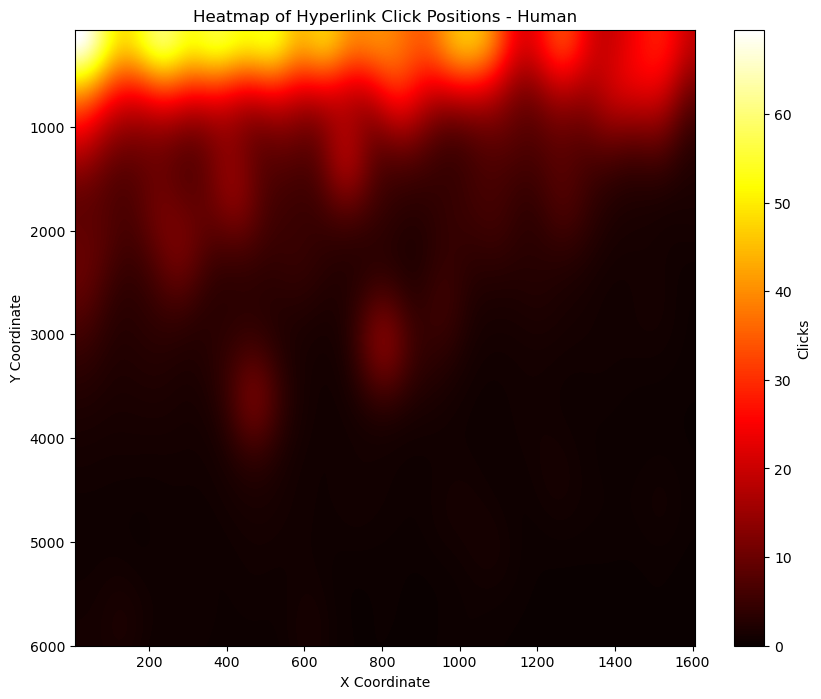

In [265]:
# Heatmap for human
x_coords = [coord[0] for coord in human_coordinates]
y_coords = [coord[1] for coord in human_coordinates]

# Define the number of bins for the histogram
x_bins = np.linspace(min(x_coords), max(x_coords), 100)
y_bins = np.linspace(min(y_coords), max(y_coords), 100)

# Calculate the 2D histogram to get the counts
counts, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=(x_bins, y_bins))

# Apply a Gaussian filter to smooth the histogram and make it continuous
heatmap_smoothed = gaussian_filter(counts, sigma=3)

# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
x_bin_centers = (xedges[:-1] + xedges[1:]) / 2
y_bin_centers = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(x_bin_centers, y_bin_centers)

c = ax.imshow(heatmap_smoothed.T, cmap='hot', interpolation='spline16', 
              extent=[x_bin_centers[0], x_bin_centers[-1], y_bin_centers[0], y_bin_centers[-1]], 
              origin='lower', aspect='auto')
fig.colorbar(c, ax=ax, label='Clicks')

y_max_limit = 6000  
ax.set_ylim(top=y_max_limit)

ax.invert_yaxis()

plt.title('Heatmap of Hyperlink Click Positions - Human')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.savefig('heatmap_human.png')
plt.show()

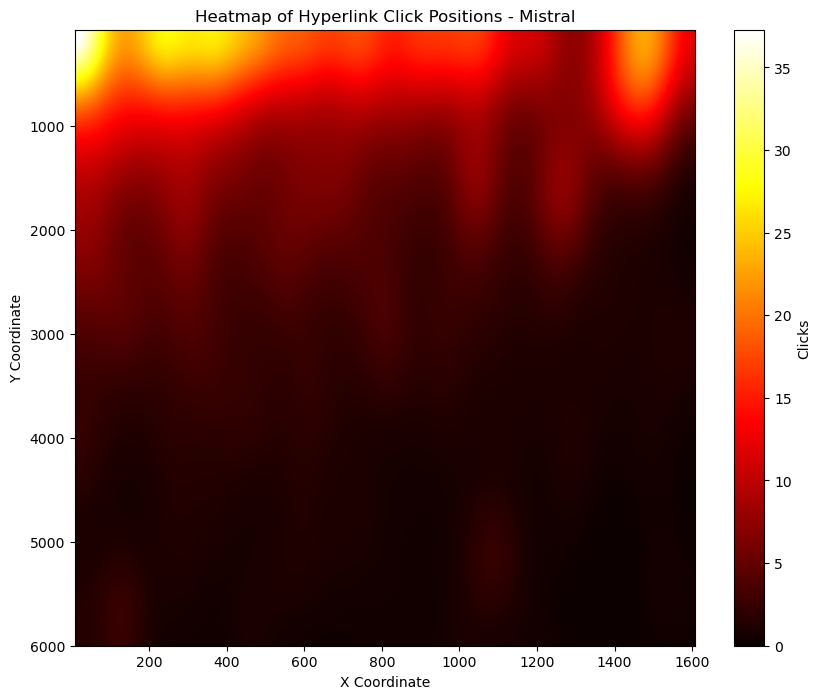

In [266]:
# Heatmap for Mistral
x_coords = [coord[0] for coord in mistral_coordinates]
y_coords = [coord[1] for coord in mistral_coordinates]

x_bins = np.linspace(min(x_coords), max(x_coords), 100)
y_bins = np.linspace(min(y_coords), max(y_coords), 100)

counts, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=(x_bins, y_bins))

heatmap_smoothed = gaussian_filter(counts, sigma=3)

fig, ax = plt.subplots(figsize=(10, 8))
x_bin_centers = (xedges[:-1] + xedges[1:]) / 2
y_bin_centers = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(x_bin_centers, y_bin_centers)

c = ax.imshow(heatmap_smoothed.T, cmap='hot', interpolation='spline16', 
              extent=[x_bin_centers[0], x_bin_centers[-1], y_bin_centers[0], y_bin_centers[-1]], 
              origin='lower', aspect='auto')
fig.colorbar(c, ax=ax, label='Clicks')

y_max_limit = 6000 
ax.set_ylim(top=y_max_limit)

ax.invert_yaxis()

plt.title('Heatmap of Hyperlink Click Positions - Mistral')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.savefig('heatmap_mistral.png')
plt.show()
